          Date   Returns
0   2010-01-01 -0.024273
1   2010-02-01  0.076290
2   2010-03-01 -0.034508
3   2010-04-01 -0.076784
4   2010-05-01 -0.010906
..         ...       ...
138 2021-07-01  0.020054
139 2021-08-01 -0.022759
140 2021-09-01  0.040360
141 2021-10-01 -0.044041
142 2021-11-01  0.056545

[143 rows x 2 columns]


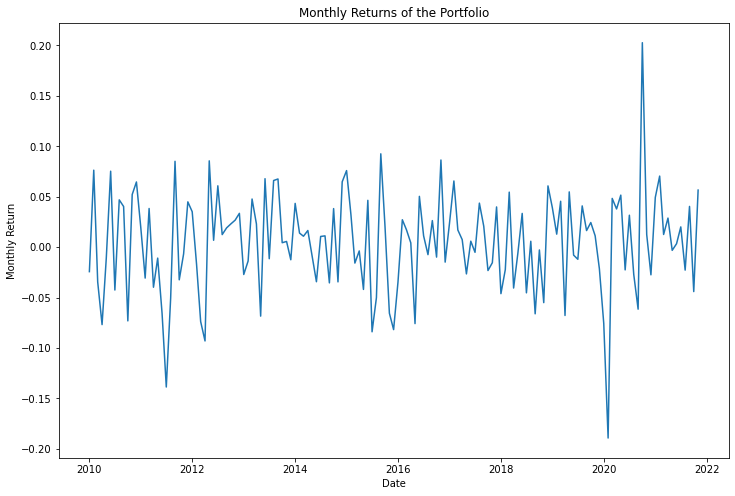

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Load the data
prices = pd.read_csv('europe indices monthly.csv', index_col='Date', parse_dates=True)

# Calculate the returns and create a new DataFrame
returns = prices.pct_change().dropna()

# Set the weights
weights = np.full(len(prices.columns), 1/len(prices.columns))

# Set the initial investment and monthly investment
initial_investment = 100
monthly_investment = 100
target_investment = 14400

# Initialize the portfolio value with the initial investment
portfolio_value = [initial_investment]

# Initialize a list to store the corresponding dates
dates = []

# Iterate over the months and calculate the portfolio value
for i in range(len(prices) - 1):
    # Rebalance the portfolio every month
    if (i + 1) % 12 == 0:
        weights = np.full(len(prices.columns), 1/len(prices.columns))
    # Calculate the returns for the current month
    returns_current_month = returns.iloc[i]
    # Calculate the portfolio return for the current month
    portfolio_return = np.dot(weights, returns_current_month)
    # Calculate the portfolio value for the current month
    portfolio_value_month = portfolio_value[i] * (1 + portfolio_return)
    # Add the monthly investment to the portfolio value
    portfolio_value_month += monthly_investment
    # Add the portfolio value to the list of portfolio values
    portfolio_value.append(portfolio_value_month)
    # Record the date for this month
    dates.append(prices.index[i])

# Convert the list of portfolio values to a numpy array
portfolio_value = np.array(portfolio_value)
# Calculate the monthly returns
monthly_returns = ((portfolio_value[1:] - 100) / portfolio_value[:-1]) - 1
# Create a DataFrame with dates and monthly returns
df = pd.DataFrame({'Date': dates, 'Returns': monthly_returns})

# Add the portfolio value as a new column in the prices DataFrame
prices['Portfolio Value'] = portfolio_value

# Calculate the total return, volatility, and Sharpe ratio
total_return = (prices['Portfolio Value'].iloc[-1] / target_investment - 1)

cov_matrix = np.cov(returns.T)
portfolio_volatility = np.sqrt(weights.T @ cov_matrix @ weights) * np.sqrt(12) * 100



# Print the DataFrame containing dates and returns
print(df)

# Plot the monthly returns
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Returns'])
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.title('Monthly Returns of the Portfolio')
plt.show()


In [170]:
df22 = pd.DataFrame(monthly_returns, columns=['Returns'])

# Now 'df' is a DataFrame containing your array
print(df22)

      Returns
0   -0.024273
1    0.076290
2   -0.034508
3   -0.076784
4   -0.010906
..        ...
138  0.020054
139 -0.022759
140  0.040360
141 -0.044041
142  0.056545

[143 rows x 1 columns]


## import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

Kurtosis: 2.0107307386754405
Skewness: -0.21423181800462968
ADF Statistic: -12.369726259699833
p-value: 5.3148064063136e-23
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}


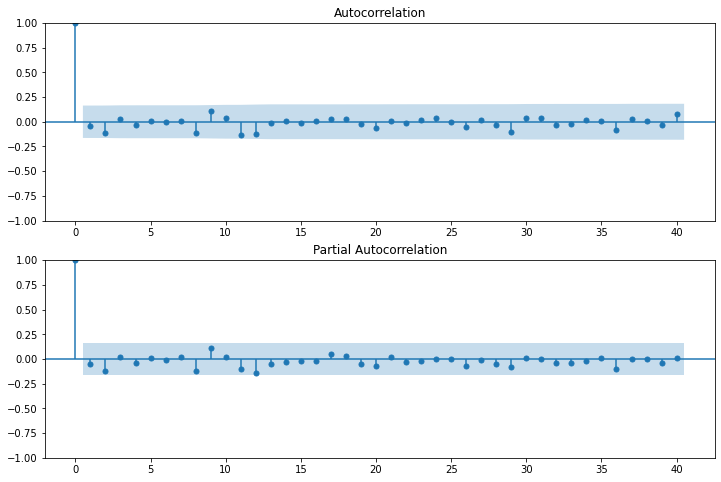

<Figure size 864x576 with 0 Axes>

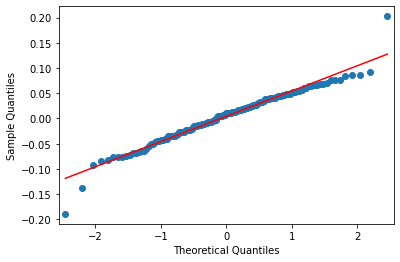

In [5]:
# ACF and PACF plots
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df['Returns'], lags=40, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['Returns'], lags=40, ax=ax2)

# QQ plot
plt.figure(figsize=(12, 8))
qq_plot = sm.qqplot(df['Returns'], line='s')

# Calculate Kurtosis and Skewness
kurt = stats.kurtosis(df['Returns'])
skew = stats.skew(df['Returns'])

print("Kurtosis:", kurt)
print("Skewness:", skew)

# Perform ADF test
adf_result = sm.tsa.adfuller(df['Returns'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

plt.show()

Kurtosis of Squared Returns: 36.948180932841765
Skewness of Squared Returns: 5.614102732242565
ADF Statistic for Squared Returns: -3.0648760554849903
p-value for Squared Returns: 0.029264091909008225
Critical Values for Squared Returns: {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}


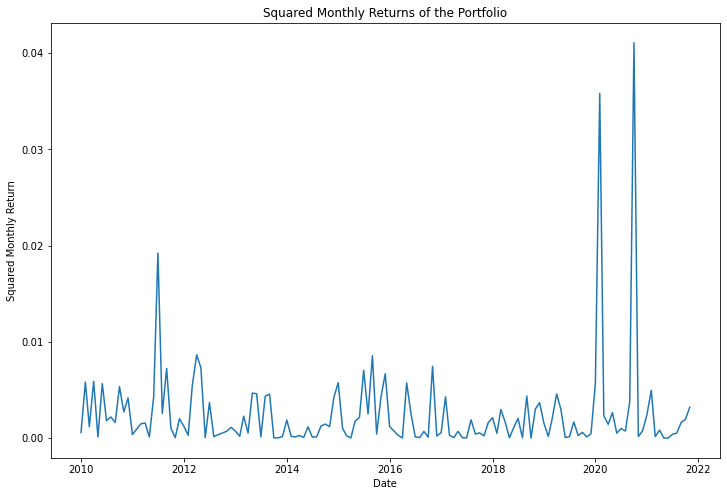

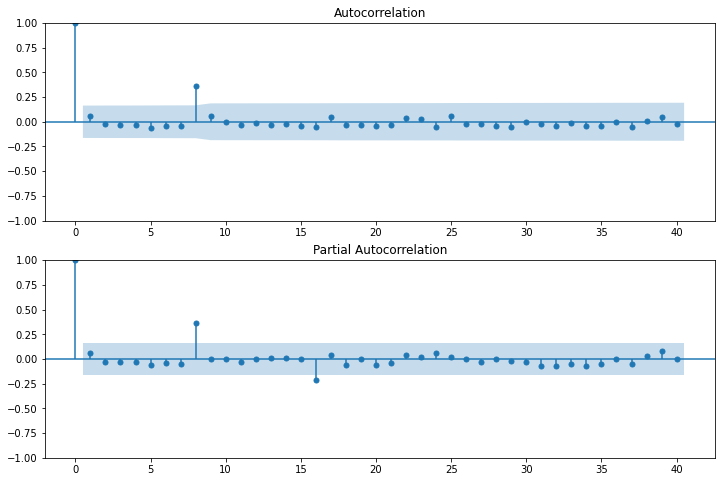

<Figure size 864x576 with 0 Axes>

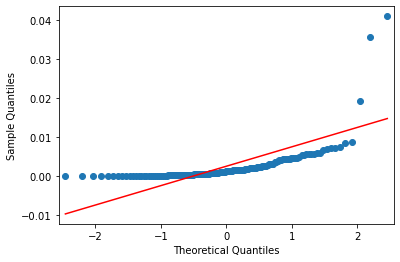

In [6]:
squared_returns = monthly_returns ** 2

# Plot the squared returns
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], squared_returns)
plt.xlabel('Date')
plt.ylabel('Squared Monthly Return')
plt.title('Squared Monthly Returns of the Portfolio')

# ACF and PACF plots for squared returns
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(squared_returns, lags=40, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(squared_returns, lags=40, ax=ax2)

# QQ plot for squared returns
plt.figure(figsize=(12, 8))
qq_plot = sm.qqplot(squared_returns, line='s')

# Calculate Kurtosis and Skewness for squared returns
kurt = stats.kurtosis(squared_returns)
skew = stats.skew(squared_returns)

print("Kurtosis of Squared Returns:", kurt)
print("Skewness of Squared Returns:", skew)

# Perform ADF test for squared returns
adf_result = sm.tsa.adfuller(squared_returns)
print("ADF Statistic for Squared Returns:", adf_result[0])
print("p-value for Squared Returns:", adf_result[1])
print("Critical Values for Squared Returns:", adf_result[4])

plt.show()

In [7]:
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", color_codes=True)
rcParams['figure.figsize'] = 8,4

In [8]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['Returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8322818.460344783
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1180.7746979204921
Iteration:      3,   Func. Count:     22,   Neg. LLF: -218.30956075043707
Iteration:      4,   Func. Count:     29,   Neg. LLF: -116.70878561115073
Iteration:      5,   Func. Count:     35,   Neg. LLF: -228.88783441816105
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2121.68104505666
Iteration:      7,   Func. Count:     47,   Neg. LLF: -231.78916137364777
Iteration:      8,   Func. Count:     52,   Neg. LLF: -212.4909200676942
Iteration:      9,   Func. Count:     59,   Neg. LLF: -231.82581443673422
Iteration:     10,   Func. Count:     64,   Neg. LLF: -231.82640405217174
Iteration:     11,   Func. Count:     69,   Neg. LLF: -231.8264245136462
Iteration:     12,   Func. Count:     74,   Neg. LLF: -231.82642600032688
Iteration:     13,   Func. Count:     78,   Neg. LLF: -231.82642600034535
Optimization terminated successfully    (Exit 

In [9]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                231.826
Distribution:                  Normal   AIC:                          -455.653
Method:            Maximum Likelihood   BIC:                          -443.801
                                        No. Observations:                  143
Date:                Fri, Aug 25 2023   Df Residuals:                      142
Time:                        05:08:58   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.0390e-03  3.010e-03      2.670  7.576e-03 [2.

In [10]:
gm_vol = gm_result.conditional_volatility
from sklearn.metrics import mean_absolute_error, mean_squared_error
gm_vol = gm_result.conditional_volatility
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae,3)}')
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse,3)}')
    return mae, mse

# Backtest model with MAE, MSE
evaluate(df['Returns'].sub(df['Returns'].mean()).pow(2), gm_vol**2)

Mean Absolute Error (MAE): 0.003
Mean Squared Error (MSE): 0.0


(0.0027319197770405202, 2.9653509206406982e-05)

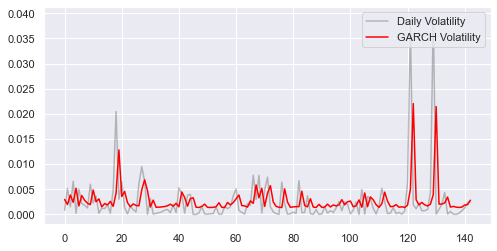

In [11]:
# Plot the actual rets volatility
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), 
         color = 'grey', alpha = 0.52, label = 'Daily Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gm_vol**2, color = 'red', label = 'GARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

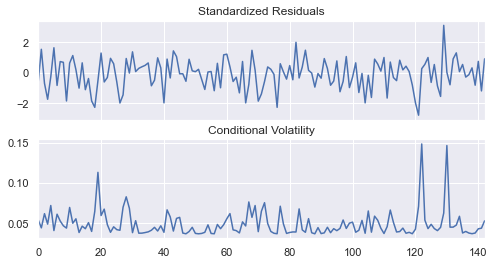

In [12]:
# Plot fitted results
gm_result.plot()
plt.show()

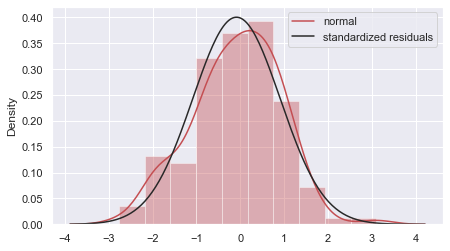

In [13]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=10, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [14]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['Returns'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility
print(print(skewt_result.summary()))

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                           Returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                233.089
Distribution:      Standardized Skew Student's t   AIC:                          -454.178
Method:                       Maximum Likelihood   BIC:                          -436.401
                                                   No. Observations:                  143
Date:                           Fri, Aug 25 2023   Df Residuals:                      142
Time:                                   05:12:35   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

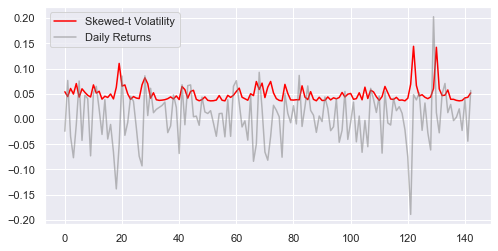

In [19]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Returns'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.52)
plt.legend(loc = 'upper left')
plt.show()

In [16]:
 #Specify GJR-GARCH model assumptions
gjr_gm = arch_model(df['Returns'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                      Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:                242.479
Distribution:      Standardized Student's t   AIC:                          -472.957
Method:                  Maximum Likelihood   BIC:                          -455.180
                                              No. Observations:                  143
Date:                      Fri, Aug 25 2023   Df Residuals:                      142
Time:                              05:13:25   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [17]:
# Specify EGARCH model assumptions
egarch_gm = arch_model(df['Returns'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                      Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:                238.473
Distribution:      Standardized Student's t   AIC:                          -464.946
Method:                  Maximum Likelihood   BIC:                          -447.169
                                              No. Observations:                  143
Date:                      Fri, Aug 25 2023   Df Residuals:                      142
Time:                              05:13:44   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

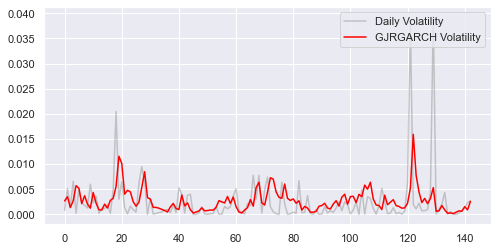

In [18]:
gjrgm_vol = gjrgm_result.conditional_volatility

# Plot the actual Bitcoin volatility
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), 
         color = 'grey', alpha = 0.4, label = 'Daily Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gjrgm_vol**2, color = 'red', label = 'GJRGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

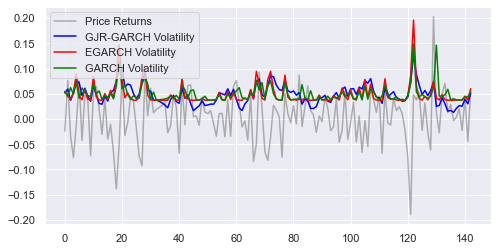

In [22]:
egarch_vol = egarch_result.conditional_volatility

# Plot the actual Bitcoin returns
plt.plot(df['Returns'], color = 'grey', alpha = 0.6, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'blue', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

# Plot GARCH#(1,1)  estimated volatility
plt.plot(gm_vol, color = 'green', label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

In [24]:
gjrgm_vol = gjrgm_result.conditional_volatility
from sklearn.metrics import mean_absolute_error, mean_squared_error
#gm_vol = gm_result.conditional_volatility
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae,3)}')
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse,3)}')
    return mae, mse

# Backtest model with MAE, MSE
evaluate(df['Returns'].sub(df['Returns'].mean()).pow(2), gjrgm_vol**2)

Mean Absolute Error (MAE): 0.002
Mean Squared Error (MSE): 0.0


(0.002441885984127595, 2.4103176757160974e-05)

In [25]:
egarch_vol = egarch_result.conditional_volatility
from sklearn.metrics import mean_absolute_error, mean_squared_error
#gm_vol = gm_result.conditional_volatility
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae,3)}')
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse,3)}')
    return mae, mse

# Backtest model with MAE, MSE
evaluate(df['Returns'].sub(df['Returns'].mean()).pow(2), egarch_vol**2)

Mean Absolute Error (MAE): 0.003
Mean Squared Error (MSE): 0.0


(0.0026836524754343207, 3.2868101136423066e-05)

In [31]:
# Print each models BIC
print(f'GJR-GARCH BIC: {gjrgm_result.bic}')
print(f'EGARCH BIC: {egarch_result.bic}')
print(f'GARCH BIC: {gm_result.bic}')

GJR-GARCH BIC: -455.1803299073226
EGARCH BIC: -447.1685536708366
GARCH BIC: -443.8014734796141


In [63]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

          parameter   p-value
mu         0.008039  0.007576
omega      0.001326  0.001704
alpha[1]   0.527743  0.033236
beta[1]    0.033419  0.755245


In [64]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-statistic by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print parameter stats
print(para_summary)

          parameter   std-err   t-value
mu         0.008039  0.003010  2.670413
omega      0.001326  0.000423  3.137533
alpha[1]   0.527743  0.247858  2.129215
beta[1]    0.033419  0.107206  0.311730


In [71]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(gm_std_resid , lags = 142)
print(lb_test)

# Assuming lb_test is a DataFrame with columns 'lb_stat' and 'lb_pvalue'

# Access the 'lb_pvalue' column using the column name
p_values = lb_test['lb_pvalue']

# Create a DataFrame with the p-values
df1 = pd.DataFrame({'P-values': p_values}).T


        lb_stat  lb_pvalue
1      0.445660   0.504403
2      1.777326   0.411205
3      1.795573   0.615899
4      2.524799   0.640201
5      2.526472   0.772503
..          ...        ...
138  127.844971   0.721243
139  127.983106   0.738521
140  130.670012   0.702077
141  133.109572   0.669680
142  133.373234   0.685409

[142 rows x 2 columns]


In [78]:
# Print the log-likelihodd of normal GARCH
print('Log-likelihood of normal GARCH :', gm_result.loglikelihood)
# Print the log-likelihodd of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

Log-likelihood of normal GARCH : 231.82642600032688
Log-likelihood of skewt GARCH : 233.08910925064293


In [118]:
last_obs=117
am = arch_model(df22['Returns'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
res = am.fit(disp='off', last_obs=last_obs)

In [119]:
#print(res)
# Now 'res' contains the model results, and the last observation is the 128th return

# Obtain model estimated residuals and volatility
gm_resid = res.resid
gm_std = res.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Obtain the empirical quantiles
q = gm_std_resid.quantile([.01, .05])
print(q)
#print(params)
print(res)

0.01   -2.259286
0.05   -1.595548
dtype: float64
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                      Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:                201.807
Distribution:      Standardized Student's t   AIC:                          -391.614
Method:                  Maximum Likelihood   BIC:                          -375.041
                                              No. Observations:                  117
Date:                      Fri, Aug 25 2023   Df Residuals:                      116
Time:                              07:26:25   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------

In [175]:
 #Set the forecast start index t
forecast_start_index = 118

# Forecast
forecasts = res.forecast(start=forecast_start_index)

# Get conditional mean and variance from index 114 onwards
cond_mean = forecasts.mean.iloc[forecast_start_index:]
cond_var = forecasts.variance.iloc[forecast_start_index:]

# Calculate quantiles
q1 = am.distribution.ppf([0.01, 0.05], res.params[5])
print(q1)


[-2.32920234 -1.64460368]


In [156]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q1[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%', '5%'], index=cond_var.index)
value_at_risk.describe()


,1%,5%
count,25.000000,25.000000
mean,0.096618,0.067931
std,0.047760,0.033722
min,0.040277,0.028150
25%,0.065102,0.045679
50%,0.080292,0.056404
75%,0.121114,0.085227
max,0.239615,0.168898


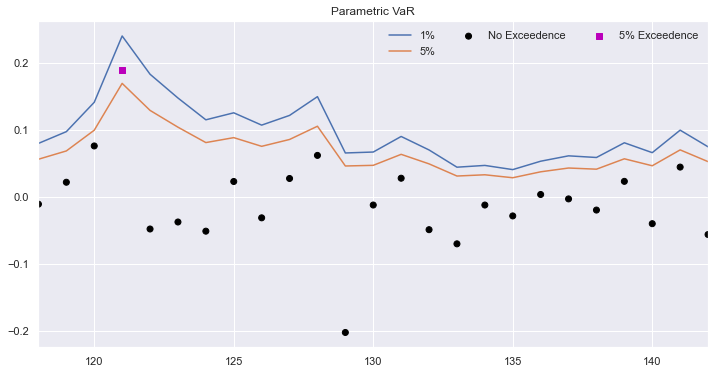

In [172]:
ax = value_at_risk.plot(legend=False, figsize=(12,6))
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])


start_index = 118
rets_2020 = df22['Returns'].iloc[start_index:]
rets_2020.name = 'Portfolio Return'
c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2020[idx] < -value_at_risk.loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
        
c = np.array(c, dtype='object')

labels = {
    
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}

markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}

for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
    
ax.set_title('Parametric VaR')
ax.legend(frameon=False, ncol=3)

plt.show()


In [176]:
# Obtain model estimated residuals and volatility
gm_resid = res.resid
gm_std = res.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Obtain the empirical quantiles
q22 = gm_std_resid.quantile([.01, .05])
print(q22)

0.01   -2.259286
0.05   -1.595548
dtype: float64


In [177]:
value_at_risk11 = -cond_mean.values - np.sqrt(cond_var).values * q.values[None, :]
value_at_risk11 = pd.DataFrame(value_at_risk11, columns=['1%', '5%'], index=cond_var.index)
value_at_risk11.describe()

,1%,5%
count,25.000000,25.000000
mean,0.093688,0.065876
std,0.046326,0.032717
min,0.039038,0.027281
25%,0.063119,0.044287
50%,0.077852,0.054692
75%,0.117449,0.082656
max,0.232393,0.163831


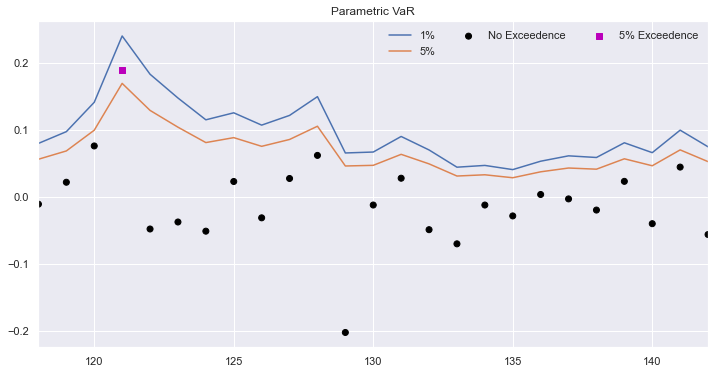

In [178]:
ax = value_at_risk.plot(legend=False, figsize=(12,6))
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])


start_index = 118
rets_2020 = df22['Returns'].iloc[start_index:]
rets_2020.name = 'Portfolio Return'
c = []

c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk11.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2020[idx] < -value_at_risk11.loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
        
c = np.array(c, dtype='object')

labels = {
    
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}

markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}

for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
    
ax.set_title('Parametric VaR')
ax.legend(frameon=False, ncol=3)

plt.show()
